In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

def lasso_cost(X, y, theta, alpha):
    m = len(y)
    y_pred = X.dot(theta)
    mse = mean_squared_error(y, y_pred)
    lasso_penalty = alpha * np.sum(np.abs(theta))
    return mse + lasso_penalty

def lasso_gradient(X, y, theta, alpha):
    m = len(y)
    y_pred = X.dot(theta)
    errors = y_pred - y
    gradient = (1/m) * X.T.dot(errors)
    lasso_penalty = (alpha/m) * np.sign(theta)
    return gradient + lasso_penalty

def lasso_regression(X, y, alpha, learning_rate, epochs):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_history = []

    for epoch in range(epochs):
        cost = lasso_cost(X, y, theta, alpha)
        cost_history.append(cost)

        gradient = lasso_gradient(X, y, theta, alpha)
        theta = theta - learning_rate * gradient

    return theta, cost_history

In [9]:
# Generate some example data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [10]:
# Add a bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Set hyperparameters
alpha = 0.1
learning_rate = 0.1
epochs = 1000

In [11]:
# Perform Lasso regression
theta_lasso, cost_history = lasso_regression(X_b, y, alpha, learning_rate, epochs)

In [12]:
# Print the resulting coefficients
print("Lasso Regression Coefficients:", theta_lasso.ravel())

Lasso Regression Coefficients: [4.21425614 2.76994325]


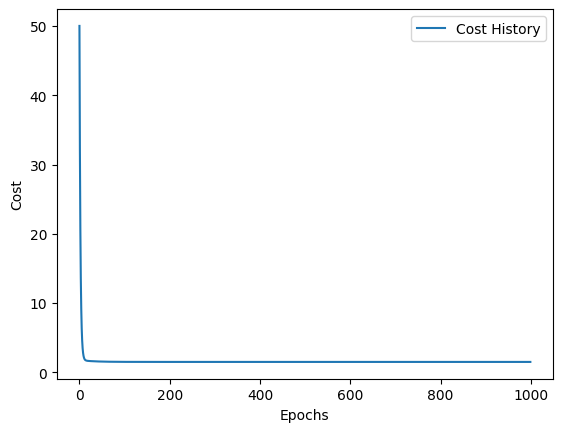

In [13]:
# Plot the cost history to check convergence
plt.plot(range(epochs), cost_history, label='Cost History')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.show()

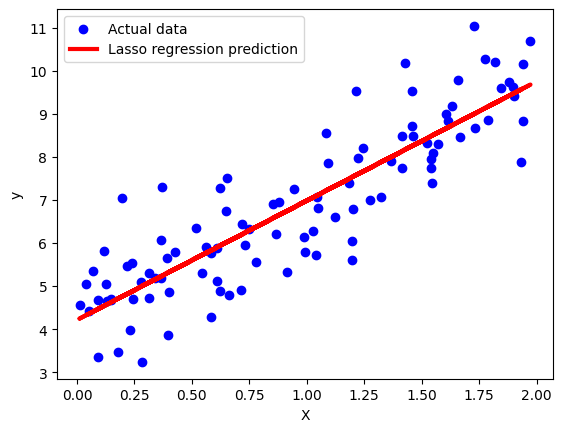

In [14]:
# Plot the results
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, X_b.dot(theta_lasso), color='red', linewidth=3, label='Lasso regression prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()